# JFLAP: Java Formal Languages and Automata Package
* https://www.jflap.org/
* JFLAP – An Interactive Formal Languages and Automata Package: https://www.jflap.org/jflapbook/jflapbook2006.pdf
  * Susan H. Rodger and Thomas W. Finley. **JFLAP: An Interactive Formal Languages and Automata Package**. Jones & Bartlett: 2006. https://www.jflap.org/

Features:
* Finit Automaton
* Mealy Machine
* Moore Machine
* Pushdown Automaton
* Turing Machine
* Multi-Tape Turing Machine
* Turing Machine With Building Blocks
* Grammar
* L-System
* Regular Expression
* Regular Pumping Lemma
* Context-Free Pumping Lemma

# GUI

In [ ]:
%classpath D:\\GoogleDrive\\wiki\\jupyter-notebooks\\Java\\lib

import util.*;
Processes.run("java -jar C:\\Users\\zhouj\\bin\\JFLAP7.1.jar");

# Code

- https://github.com/evandroforks/JFLAP_FormalLanguagesExperimenting 2016-09-05
- https://github.com/citiususc/jflap-lib 2018-02-06 JFLAP 7.0
- https://github.com/jakubriegel/PUTflap 2018-12-28 JFLAP 7.1
- https://github.com/Paulo-Rozatto/jflap 2024-08-16 JFLAP 7.1  -- CHOOSEN

## Use as a library

In [14]:
// example in https://github.com/citiususc/jflap-lib
// %maven jflap:JFlap:7.1-MAVEN-SNAPSHOT
%jars C:\\Users\\zhouj\\.m2\\repository\\jflap\\JFlap\\7.1-MAVEN-SNAPSHOT\\JFlap-7.1-MAVEN-SNAPSHOT.jar

import automata.*;
import automata.fsa.*;
import file.*;

// Load an automaton jff file
FiniteStateAutomaton automaton = (FiniteStateAutomaton)new XMLCodec().decode(new File("IATLC/iatlc-2.9.jff"), null);
// Load a simulator to test the automaton
AutomatonSimulator sim = SimulatorFactory.getSimulator(automaton);
if (sim == null) throw new RuntimeException("Cannot load an automaton simulator for " + automaton.getClass());
// Test the automaton with an input
System.out.println(sim.simulateInput("10010")); // false
System.out.println(sim.simulateInput("10001")); // true

false
true


# JFLAP – An Interactive Formal Languages and Automata Package

# IATLC: Introduction to Automata Theory, Languages, and Computation

## Finite Automata

- Figure 2.9: An NFA accepting all strings that end in 01

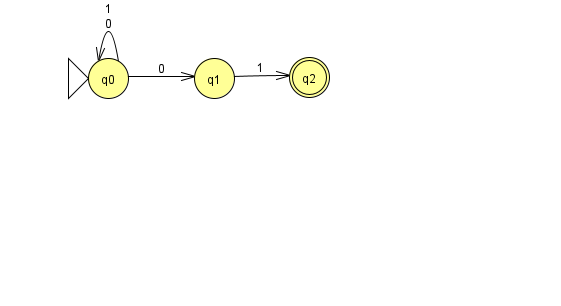

In [1]:
import javax.imageio.ImageIO;
import java.io.File;

ImageIO.read(new File("IATLC/iatlc-2.9.jff.png"));

## Context Free Grammar

- Figure 5.1: A context	free grammar for palindromes

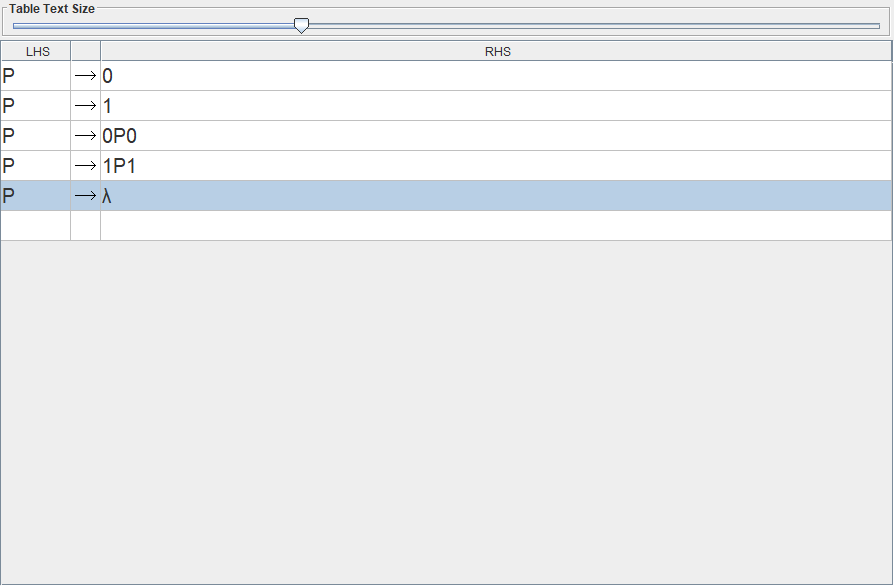

In [5]:
import javax.imageio.ImageIO;
import java.io.File;

ImageIO.read(new File("IATLC/iatlc-5.1.jff.rule.png"));

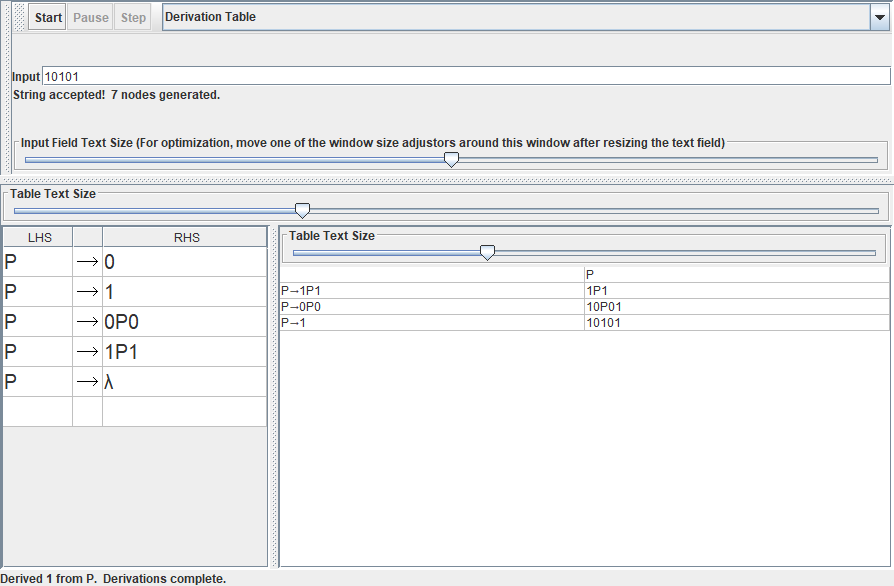

In [6]:
import javax.imageio.ImageIO;
import java.io.File;

ImageIO.read(new File("IATLC/iatlc-5.1.jff.png"));

## Turning Machine

$$
M = (Q, \Sigma, \Gamma, \delta, q_{0}, B, F)
$$

- $Q$: 状态的有限集
- $\Sigma$: 输入符号的有限集
- $\Gamma$: 磁带符号的完备集, $\Sigma$总是$\Gamma$的子集
- $\delta(q, XX) = (p, YY, D)$: 转移函数$\delta$, 状态$q$, 磁带符号$XX$
  - $p$: 下一个状态
  - $YY$: $\Gamma$中符号, 写入当前扫描的单元, 替换原有符号
  - $D$: 方向, $L$或$R$
  - 含义: 当前状态为$q$, 遇到磁带单元符号$XX$, 切换为下一状态$p$, 磁头写入符号$YY$, 并将磁头朝方向$D$移动
  - JFLAP中标记  $q$ --([$XX$]; [$YY$], [$D$])--> $p$
- $q_{0}$: 开始状态
- $B$: 空符号, 不是输入符号
- $F$: 最终/接受状态集

Example:

- Figure 8.9: A Turing machine to accept $\{0^{n}1^{n} | n \ge 1 \}$
- Figure 8.10: Transition diagram for a TM that accepts strings of the form $0^{n}1^{n}$


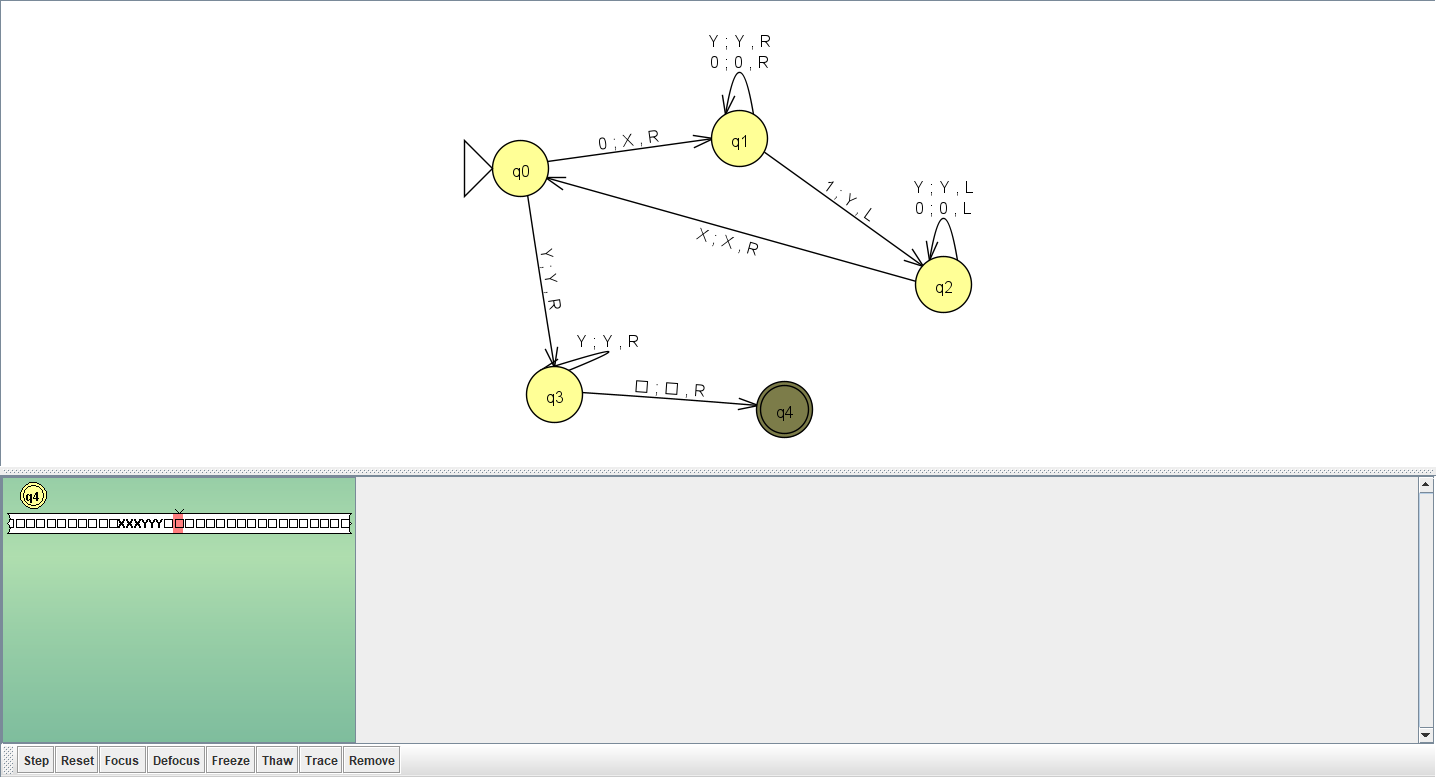

In [15]:
ImageIO.read(new File("IATLC/iatlc-8.10.jff.png"));

In [1]:
%jars C:\\Users\\zhouj\\.m2\\repository\\jflap\\JFlap\\7.1-MAVEN-SNAPSHOT\\JFlap-7.1-MAVEN-SNAPSHOT.jar

import automata.*;
import automata.fsa.*;
import automata.turing.*;
import file.*;

import file.xml.*;
import org.w3c.dom.Document;

import javax.xml.parsers.*;
import gui.environment.Universe;


Universe.curProfile.setAcceptByFinalState(true);
Universe.curProfile.setAcceptByHalting(true);
Universe.curProfile.setDebugOutput(true);

// Load an automaton jff file
DocumentBuilderFactory factory = DocumentBuilderFactory.newInstance();
DocumentBuilder builder = factory.newDocumentBuilder();
Document doc = builder.parse(new File("IATLC/iatlc-8.10.jff"));
// SKIP JOptionPane
// Transducer transducer = TransducerFactory.getTransducer(doc);
Transducer transducer = new TMTransducer(); // or TMBBTransducer
TuringMachine tm = (TuringMachine) transducer.fromDOM(doc);
// Load a simulator to test the automaton
TMSimulator sim = new TMSimulator(tm);
if (sim == null) throw new RuntimeException("Cannot load an automaton simulator for " + tm.getClass());
// Test the automaton with an input
System.out.println(sim.simulateInput("000111")); // true
System.out.println(sim.simulateInput("000101")); // false

DEBUG: Accepted by configuration [q_4 at (329,271) label: null] TAPE 0: [XXXYYY□□] TAPE HEAD AT 7
true
DEBUG: Rejected due to halt by configuration [q_1 at (297,78) label: null] TAPE 0: [XXXY0Y□] TAPE HEAD AT 6
false
